# Differential expression analysis - Larvae bacterial exposure experiment
This notebook contains the code for analyzing the count matrix generated from the TagSeq processing notebook for differential expression. The data analyzed in this notebook is from the larvae bacterial exposure experiment we conducted which included three treatment groups, a control, a pathogen exposure (*Vibrio corallilyticus* strain RE22), and a probiotic exposure (*Phaeobacter inhibens* strain S4). We used the DESeq2 package in R to identify differentially expressed transcripts in pairwise comparisons of each of our treatments. For more details on the project the manuscript citation is provided below.

#### Manuscript Reference
Borbee, E.M., Changsut, I.V., Bernabe, K., Schickle, A., Nelson, D., Sharp, K.H., and Fuess, L.E. (2025) Coral larvae have unique transcriptomic responses to pathogenic and probiotic bacteria. *In prep*.

## Contents
1. [Load packages and set working directory](#1)
2. [Import data](#2)
3. [Mean count filtering](#3)
4. [Normalizing counts](#4)
5. [Running differential expression](#5)
6. [PCA of normalized counts](#6)
7. [Volcano plots](#7)
8. [Log fold change plots](#8)

<a id=1></a>
## 1. Load packages and set working directory
The following packages will need to be installed and/or loaded to run this script:
- `DESeq2`
- `ggplot2`
- `vegan`
- `dplyr`

The first block of commands loads the above packages and the second command sets the working directory to the location where my data is.

In [1]:
library(DESeq2)
library(ggplot2)
library(vegan)
library(dplyr)
library(ggvenn)
library(ggpubr)

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, saveRDS, setdiff,
    table, tapply, union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomicRanges

Loading required package: GenomeInfoDb



In [2]:
setwd("~/Desktop/TXST/AstrangiaLarval_transcriptomics/finalTranscriptome/DEseq")

<a id=2></a>
## 2. Import data
*Count data*

Here we start by importing our count data and checking that it imported correctly using the `head()` command.

In [3]:
counts <- read.table("all_counts.txt", header = TRUE, sep = "\t", row.names= 1, check.names= FALSE)
head(counts)

,EB001_trimmed.fastq.sam.counts,EB002_trimmed.fastq.sam.counts,EB003_trimmed.fastq.sam.counts,EB004_trimmed.fastq.sam.counts,EB005_trimmed.fastq.sam.counts,EB006_trimmed.fastq.sam.counts,EB007_trimmed.fastq.sam.counts,EB008_trimmed.fastq.sam.counts,EB009_trimmed.fastq.sam.counts,EB010_trimmed.fastq.sam.counts,EB011_trimmed.fastq.sam.counts,EB012_trimmed.fastq.sam.counts,EB013_trimmed.fastq.sam.counts,EB014_trimmed.fastq.sam.counts,EB015_trimmed.fastq.sam.counts,
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<lgl>
TRINITY_DN10002_c0_g1_i1,2,3,4,4,6,0,6,5,4,4,4,2,1,9,2,NA
TRINITY_DN100053_c0_g1_i1,4,0,2,2,0,0,4,1,2,0,0,1,0,2,1,NA
TRINITY_DN10006_c0_g1_i6,163,294,230,325,98,91,303,370,175,133,139,90,213,199,190,NA
TRINITY_DN100083_c0_g2_i1,1,2,1,2,1,0,1,1,1,1,0,0,1,1,2,NA
TRINITY_DN1000_c0_g1_i1,12,11,11,10,2,5,10,10,9,3,10,3,6,7,8,NA
TRINITY_DN1000_c1_g1_i2,12,15,6,11,9,6,20,19,3,2,2,1,25,14,9,NA


Next we will fix the sample headers by removing the extra text after the sample ID. Only the sample ID should remain for the column names, in this case EB followed by the sample number. This is important because the column names of your count matrix must match the column containing the sample IDs in your metadata.

In [4]:
names(counts) <- gsub("_trimmed.fastq.sam.counts", '', names(counts), fixed=TRUE)
names(counts)

[1] "EB001" "EB002" "EB003" "EB004" "EB005" "EB006" "EB007" "EB008" "EB009"
[10] "EB010" "EB011" "EB012" "EB013" "EB014" "EB015" ""

Now, we need to check to make sure the matrix has the same number of columns as there are samples. In this case there is an additional blank column at the end of the matrix so we need to remove that. The following code checks the number of columns in the matrix and then removes the blank column at the end and checks to make sure it was done successfully.

In [5]:
ncol(counts)
counts <- counts[1:15]
ncol(counts)

[1] 16

[1] 15

*Metadata*

Now we will import our metadata and check that it has the same number of rows as the count matrix has columns. 

In [6]:
metadata <- read.csv("Astrangia_LarvalExp_MetaData.csv", check.names = FALSE)
nrow(metadata)

[1] 15

Finally we make sure the metadata rows are ordered in the same order as the count matrix columns. This is important because, DESeq assumes they will be in the same order and uses that to build the comparisons.

In [7]:
metadata <- metadata[order(metadata$sampleID),]

<a id=3></a>
## 3. Mean count filtering
To reduce noise in the dataset and better resolve differential expression amongst our transcripts we filtered transcripts that had a mean of <1 across all samples. 

In [8]:
means <- as.data.frame(apply(counts,1,mean))
names(means)[1] <- "mean"

The following code calculates the means for each transcript and then uses the `subset()` command to remove the transcript rows below the threshold and then used the IDs from the filtered table to filter the count matrix.

In [9]:
filtered_means <- subset(means, mean >= 1)
filtered_counts <- subset(counts, rownames(counts) %in% rownames(filtered_means))

## 4. Normalizing counts
Once the counts were filtered we used the default methods from DESeq2 for normalizing the counts before calculating differential expression. The first block of commands creates a DESeq dataset from the count matrix and the second block of commands performs the variance stabilization transformation to create the normalized count matrix.

The `countData` option designates the count matrix, the `colData` option indicates the metadata file, and the `design` option indicates the metadata variables you are interested in modeling your differential expression by in the next steps. In the case of this project, we are interested in identifying differentially expressed transcripts amongst our control, pathogen, and probiotic treatments.

In [10]:
dds <- DESeqDataSetFromMatrix(countData = counts, 
                              colData = metadata, 
                              design = ~treatment)
dds <- estimateSizeFactors(dds)         
dds <- estimateDispersions(dds)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates



In [11]:
vst <- getVarianceStabilizedData(dds)
write.csv(vst, file = "normalizedreads.csv")
names(metadata)
colnames(counts)=NULL

[1] "sampleID"    "sampleNum"   "treatment"   "timeStarted" "timeEnded"

<a id=5></a>
## 5. Running differential expression
Once the count data have been normalized, we can run the differential expression model using the following command. The second command calls the results of the initial run.

In [12]:
dds <- DESeq(dds)
resultsNames(dds)

using pre-existing size factors

estimating dispersions

found already estimated dispersions, replacing these

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



[1] "Intercept"                 "treatment_RE22_vs_Control"
[3] "treatment_S4_vs_Control"

Next we want to generate contrasts for each of our pairwise comparisons. The default run gave us RE22vsControl and S4vsControl. RE22 represents our pathogen strain and S4 represents our probiotic strain. The last remaining comparison is to compare our pathogen and probiotic directly to one another which we did using a contrast. Below is the code we used to set up the contrast and the results object containing those data.

In [13]:
resRE22vS4 <- results(dds,contrast=list(c("treatment_RE22_vs_Control"),  c("treatment_S4_vs_Control")))
resultsNames(resRE22vS4)

character(0)

Now that our contrasts are generated we can look at the differentially expressed transcripts using the following commands.

*Pathogen vs Control Results*

When comparing pathogen to control we had 3 differentially expressed transcripts all with positive log fold changes, indicating that they were upregulated in the pathogen treatment relative to their expression in control samples.

In [14]:
treatment <- results(dds,contrast=list(c("treatment_RE22_vs_Control")))
treatmentOrdered <- treatment[order(treatment$padj),]
head(treatmentOrdered, 35)
write.csv(treatmentOrdered, file = "DESeq_RE22vControl.csv")

log2 fold change (MLE): treatment_RE22_vs_Control effect 
Wald test p-value: treatment_RE22_vs_Control effect 
DataFrame with 35 rows and 6 columns
                           baseMean log2FoldChange     lfcSE       stat
                          <numeric>      <numeric> <numeric>  <numeric>
TRINITY_DN7931_c0_g2_i2   213.44790        4.09527  0.403563   10.14778
TRINITY_DN2150_c0_g1_i10   58.81422        4.12732  0.485387    8.50316
TRINITY_DN34410_c0_g1_i1  162.00814        3.37414  0.497255    6.78553
TRINITY_DN84171_c0_g1_i2   37.70432        1.81239  0.370971    4.88553
TRINITY_DN40298_c0_g1_i4    2.09603        4.66700  1.124630    4.14981
...                             ...            ...       ...        ...
TRINITY_DN10029_c0_g2_i17  2.276768     -0.1432659  0.767764 -0.1866013
TRINITY_DN10029_c0_g2_i9   0.269952      0.0671326  2.075895  0.0323391
TRINITY_DN100301_c0_g1_i2  0.147640     -0.5725422  3.532964 -0.1620572
TRINITY_DN10033_c0_g1_i2   3.019516     -0.1694181  0.631768

*Probiotic vs Control Results*

When comparing probiotic to control we had 9 differentially expressed transcripts all with positive log fold changes, indicating that they were upregulated in the probiotic treatment relative to their expression in control samples.

In [15]:
treatment <- results(dds,contrast=list(c("treatment_S4_vs_Control")))
treatmentOrdered <- treatment[order(treatment$padj),]
head(treatmentOrdered, 35)
write.csv(treatmentOrdered, file = "DESeq_S4vControl.csv")

log2 fold change (MLE): treatment_S4_vs_Control effect 
Wald test p-value: treatment_S4_vs_Control effect 
DataFrame with 35 rows and 6 columns
                           baseMean log2FoldChange     lfcSE      stat
                          <numeric>      <numeric> <numeric> <numeric>
TRINITY_DN34410_c0_g1_i1   162.0081        4.40288  0.496387   8.86985
TRINITY_DN303_c2_g1_i1      18.0174        3.90160  0.571940   6.82170
TRINITY_DN84171_c0_g1_i2    37.7043        2.50909  0.368524   6.80849
TRINITY_DN43495_c0_g1_i1    11.9981        6.55612  0.970490   6.75548
TRINITY_DN17150_c0_g2_i1    14.2546        3.15794  0.477899   6.60797
...                             ...            ...       ...       ...
TRINITY_DN100360_c0_g1_i1  1.264641       0.113442  0.994533  0.114066
TRINITY_DN100361_c0_g1_i1  0.431344      -0.943491  2.067684 -0.456304
TRINITY_DN1003_c0_g1_i10   2.213369      -0.350403  0.834096 -0.420100
TRINITY_DN100424_c0_g1_i1  0.769792      -0.426452  1.592062 -0.267861
TRIN

*Probiotic vs Pathogen Results*

When comparing pathogen and probiotic treatments we had 7 differentially expressed transcripts all with positive log fold changes, indicating that they were upregulated in the probiotic treatment relative to their expression in pathogen samples.

In [16]:
treatment <- results(dds,contrast=list(c("treatment_RE22_vs_Control","treatment_S4_vs_Control")))
treatmentOrdered <- treatment[order(treatment$padj),]
head(treatmentOrdered, 35)
write.csv(treatmentOrdered, file = "DESeq_RE22vS4.csv")

log2 fold change (MLE): treatment_RE22_vs_Control+treatment_S4_vs_Control effect 
Wald test p-value: treatment_RE22_vs_Control+treatment_S4_vs_Control effect 
DataFrame with 35 rows and 6 columns
                           baseMean log2FoldChange     lfcSE      stat
                          <numeric>      <numeric> <numeric> <numeric>
TRINITY_DN7931_c0_g2_i2    213.4479        6.47113  0.709985   9.11446
TRINITY_DN34410_c0_g1_i1   162.0081        7.77702  0.873678   8.90148
TRINITY_DN2150_c0_g1_i10    58.8142        6.58488  0.873676   7.53698
TRINITY_DN84171_c0_g1_i2    37.7043        4.32148  0.659153   6.55611
TRINITY_DN303_c2_g1_i1      18.0174        6.19690  1.061101   5.84006
...                             ...            ...       ...       ...
TRINITY_DN10023_c1_g1_i2  0.0708484       1.029705   6.51596  0.158028
TRINITY_DN100250_c0_g1_i1 0.0582658       1.029705   6.51596  0.158028
TRINITY_DN100281_c0_g1_i2 0.1697095       1.606786   5.77860  0.278058
TRINITY_DN100284_c0_g1_

<a id=6></a>
## 6. PCA of normalized counts
Next we ran a princpal component analysis (PCA) of our normalized counts to see how the transcript expression profiles of our samples compared to one another. We ran the PCA using the `prcomp()` command and used `summary()` to view the output of the analysis.

In [17]:
pca <- prcomp(t(vst))
summary(pca)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     5.5827 5.1147 4.75238 4.64229 4.52668 4.32716 4.13888
Proportion of Variance 0.1227 0.1030 0.08894 0.08487 0.08069 0.07374 0.06746
Cumulative Proportion  0.1227 0.2258 0.31470 0.39957 0.48027 0.55401 0.62147
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     4.02871 3.92845 3.77346 3.65610 3.56118 3.49019 3.46231
Proportion of Variance 0.06392 0.06078 0.05607 0.05264 0.04994 0.04797 0.04721
Cumulative Proportion  0.68539 0.74616 0.80224 0.85488 0.90482 0.95279 1.00000
                           PC15
Standard deviation     1.77e-13
Proportion of Variance 0.00e+00
Cumulative Proportion  1.00e+00

Next for plotting we extracted the PCA coordinates for our samples into a dataframe so that we could plot using ggplot. We extracted the coordinates using the `scores()` command from the `vegan` package. Once we had the coordinates we merged that dataframe with our metadata to have all of the plotting variables in a single dataframe.

In [18]:
pca_coords <- as.data.frame(scores(pca, display = "sites"))
pca_merged <- cbind(metadata, pca_coords)

Finally, we plotted the PCA ordination using ggplot.

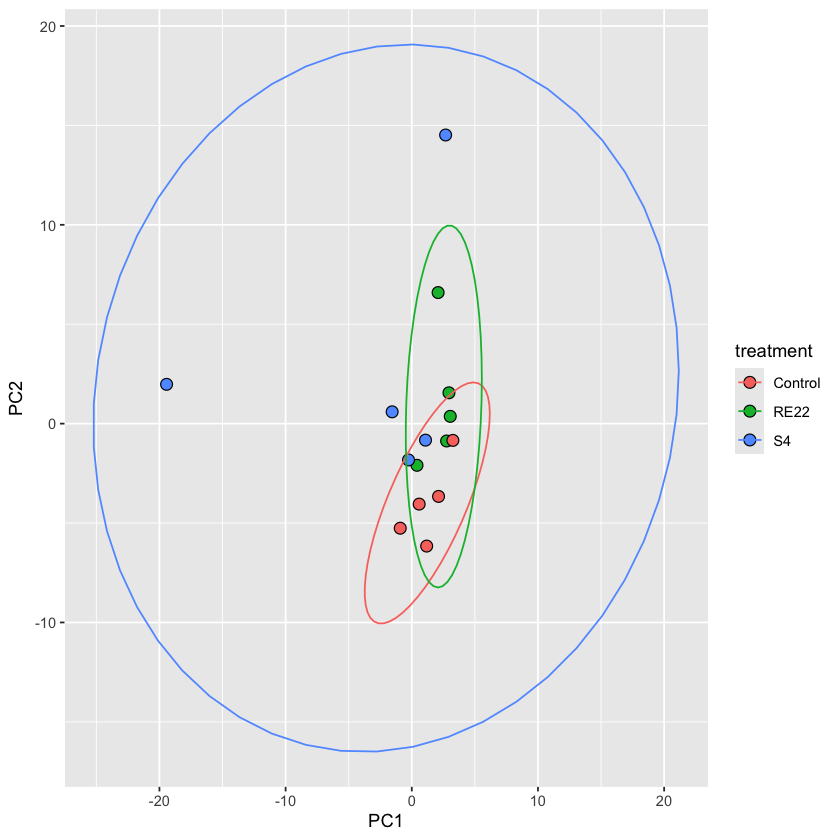

In [19]:
pca_plot <- ggplot(pca_merged, aes(PC1, PC2, fill = treatment)) + 
            geom_point(pch = 21, size = 3) + 
            stat_ellipse(aes(color = treatment))
pca_plot

<a id=7></a>
## 7. Volcano plots
Another way we visualize our differential expression data is through volcano plots. Volcano plots relate the log2 fold change to the log scale of the p-adjusted value for each transcript. 

To plot these for each comparison in a single graph, we start by formatting our dataframe. The first few blocks of commands imports the differential expression output with log2 fold change and p-adjusted values, then renames the column containing the transcript IDs to "transcript", and then adds a column named comparison, where we indicate the comparison for each individual output file. This is done separately for each of our three comparisons to prep them for merging into a single dataframe.

*Pathogen vs Control*

In [20]:
RE22vControl <- read.csv("DESeq_RE22vControl.csv")
names(RE22vControl)[1] <- "transcript"
RE22vControl$comparison <- "RE22vControl"

*Probiotic vs Control*

In [21]:
S4vControl <- read.csv("DESeq_S4vControl.csv")
names(S4vControl)[1] <- "transcript"
S4vControl$comparison <- "S4vControl"

*Pathogen vs Probiotic*

In [22]:
RE22vS4 <- read.csv("DESeq_RE22vS4.csv")
names(RE22vS4)[1] <- "transcript"
RE22vS4$comparison <- "RE22vS4"

Once we have all of the dataframes formatted correctly, we merge them into a single dataframe using the `rbind()` command.

In [23]:
DESeq_merged <- rbind(RE22vControl, S4vControl, RE22vS4)

Next we are going to add a significance column named sig to indicate what color points in the graph should be based on p-adjusted significance values. We do this using a combination of the `mutate()` and `case_when()` commands from `dplyr` and use a significance cutoff of p-adj < 0.1 and an absolute value of log2 fold change > 2.

In [24]:
DESeq_merged <- DESeq_merged %>% mutate(sig = case_when(padj > 0.1 | abs(log2FoldChange) < 2 ~ "no",
                                                        padj < 0.1 | abs(log2FoldChange) > 2 ~ "yes"))

Once all of those steps are done, we can plot the volcano plot using ggplot. The first block of code sets the theme and the second makes the plot.

In [25]:
theme_set(theme_bw() + 
          theme(panel.grid = element_blank()) + 
          theme(strip.background = element_rect(fill = "black"), 
                strip.text = element_text(face = "bold", color = "white")))

Warning message:
“Removed 6754 rows containing missing values or values outside the scale range
(`geom_point()`).”


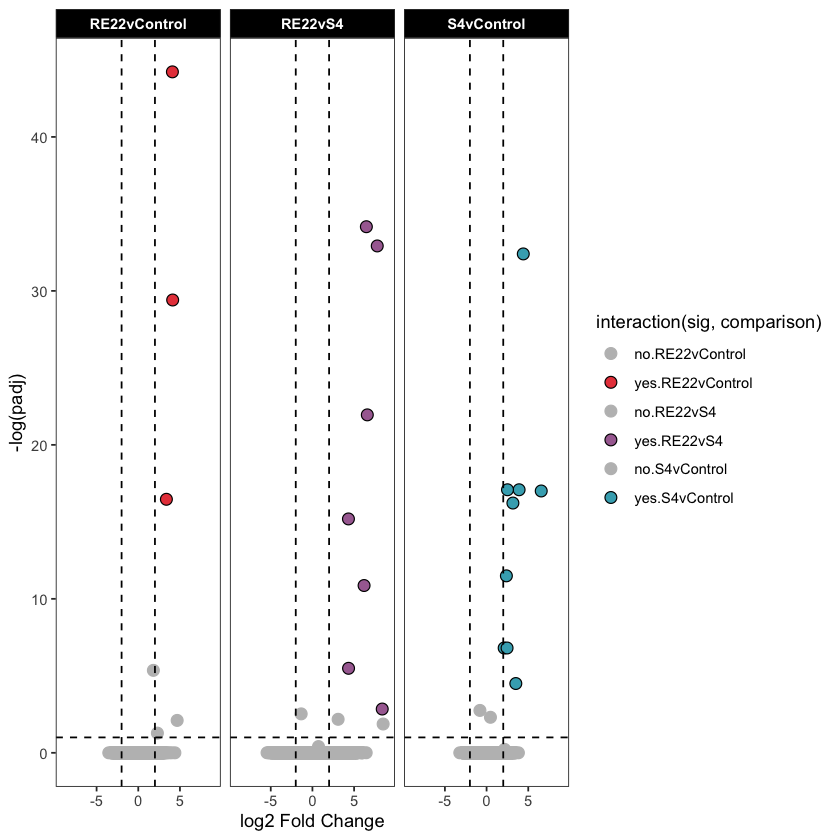

In [26]:
volcano_plot <- ggplot(DESeq_merged, aes(log2FoldChange, -log(padj), 
                                         fill = interaction(sig, comparison), 
                                         color = interaction(sig, comparison))) +
                geom_point(size = 3, pch = 21) + 
                facet_grid(~comparison) + 
                geom_hline(yintercept = 1, lty = 2) +
                geom_vline(xintercept = -2, lty = 2) + 
                geom_vline(xintercept = 2, lty = 2) +
                xlim(-9,9) + 
                scale_fill_manual(values = c('no.RE22vControl' = "grey",
                                             'yes.RE22vControl' = "#E84649",
                                             'no.S4vControl' = "grey",
                                             'yes.S4vControl' = "#42ACBD",
                                             'no.RE22vS4' = "grey",
                                             'yes.RE22vS4' = "#A86DA0")) +
                scale_color_manual(values = c('no.RE22vControl' = "grey",
                                              'yes.RE22vControl' = "black",
                                              'no.S4vControl' = "grey",
                                              'yes.S4vControl' = "black",
                                              'no.RE22vS4' = "grey",
                                              'yes.RE22vS4' = "black")) + 
                xlab("log2 Fold Change")
volcano_plot

Finally, the plot was exported as a PDF using the `ggsave()` function. Final edits for the publication figure were done in Adobe Illustrator.

<a id=9></a>
## 8. Log fold change plots
Next, we compared the transcripts differentially expressed in pathogen vs control and probiotic vs control comparisons. We used a combination of venn diagrams, box plots, and scatter plots to look at the log fold changes of the shared and unique transcripts between the comparisons. 

First, we import our differential expression data and filter to only significantly differentially expressed transcripts based on the same parameters above (p-adjusted < 0.1 and absolute value log2 fold change > 2). Then, just as with the volcano plots we add a column to each dataframe indicating the comparison each dataframe represents.

In [27]:
RE22 <- read.csv("DESeq_RE22vControl.csv")
S4 <- read.csv("DESeq_S4vControl.csv")

In [28]:
RE22_filtered <- subset(RE22, padj < 0.1 & abs(log2FoldChange) > 2)
S4_filtered <- subset(S4, padj < 0.1 & abs(log2FoldChange) > 2)

In [29]:
RE22_filtered$comparison <- "RE22vControl"
S4_filtered$comparison <- "S4vControl"

Now we can use the filtered dataframes to construct a venn diagram. We start by building a list with the transcripts differentially expressed in each comparison and then use that list to plot a venn diagram.

In [30]:
venn <- list('RE22vControl' = RE22_filtered$X,
             'S4vControl' = S4_filtered$X)

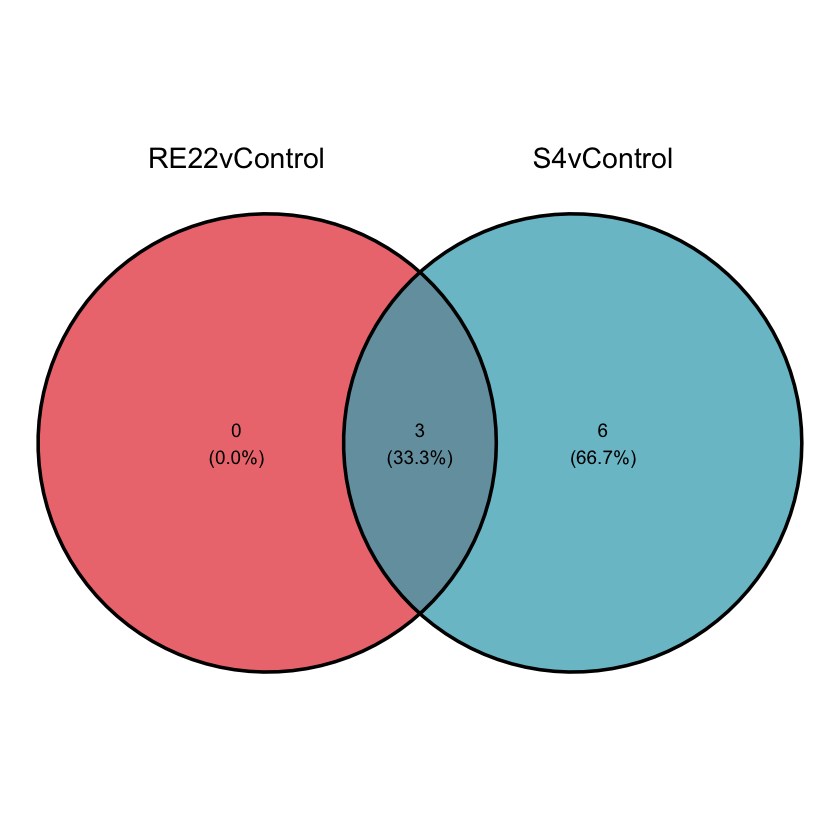

In [31]:
venn_diagram <- ggvenn(venn, c("RE22vControl","S4vControl"), fill_color = c("#E84649","#42ACBD"), fill_alpha = 0.75)
venn_diagram

Now we merge the dataframes from above into one using `rbind()` to plot a boxplot of the log fold changes in each comparison.

In [32]:
merged_data <- rbind(RE22_filtered, S4_filtered)
merged_data

X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,comparison
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
TRINITY_DN7931_c0_g2_i2,213.447901,4.095274,0.4035634,10.147783,3.389771e-24,6.212094e-20,RE22vControl
TRINITY_DN2150_c0_g1_i10,58.814216,4.127324,0.4853870,8.503161,1.844961e-17,1.690538e-13,RE22vControl
TRINITY_DN34410_c0_g1_i1,162.008139,3.374140,0.4972554,6.785527,1.156635e-11,7.065499e-08,RE22vControl
TRINITY_DN34410_c0_g1_i1,162.008139,4.402882,0.4963873,8.869851,7.324376e-19,8.477966e-15,S4vControl
TRINITY_DN303_c2_g1_i1,18.017374,3.901601,0.5719399,6.821697,8.997136e-12,3.805538e-08,S4vControl
TRINITY_DN84171_c0_g1_i2,37.704316,2.509089,0.3685238,6.808485,9.863164e-12,3.805538e-08,S4vControl
TRINITY_DN43495_c0_g1_i1,11.998099,6.556123,0.9704898,6.755479,1.423642e-11,4.119663e-08,S4vControl
TRINITY_DN17150_c0_g2_i1,14.254564,3.157943,0.4778989,6.607972,3.896192e-11,9.019685e-08,S4vControl
TRINITY_DN7931_c0_g2_i2,213.447901,2.375859,0.4069751,5.837848,5.287931e-09,1.020130e-05,S4vControl


We also added an additional column to indicate whether the transcript was unique to probiotic (S4) or shared so that we could use that to color points.

In [33]:
merged_data$color <- c("shared","shared","shared","shared","S4","S4","S4","S4","shared","S4","shared","S4")

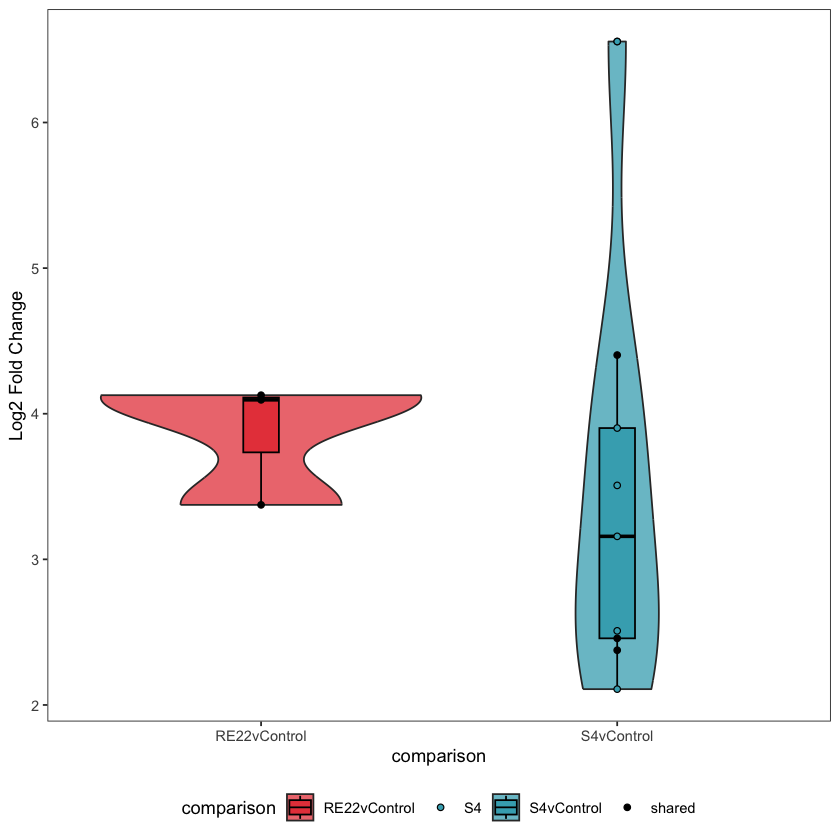

In [34]:
boxplot <- ggplot(merged_data, aes(comparison, log2FoldChange)) + 
           geom_violin(alpha = 0.75, aes(fill = comparison)) +
           geom_boxplot(width = 0.1, color = "black", aes(fill = comparison)) + 
           geom_point(shape = 21, aes(fill = color)) + 
           scale_fill_manual(values = c('RE22vControl' = "#E84649",
                                        'S4vControl' = "#42ACBD",
                                        'S4' = "#42ACBD",
                                        'shared' = "black")) +
           ylab("Log2 Fold Change") +
           theme(legend.position = "bottom") + 
           theme(panel.grid = element_blank())
boxplot

Next we build a dataframe to compare the log fold change values in the probiotic and pathogen response for the three transcripts differentially expressed in both conditions. We start by subsetting the full dataframe to only the pathogen vs control and probiotic vs control comparisons. 

In [35]:
merged_data_filtered <- subset(merged_data, X %in% RE22_filtered$X)
merged_data_filtered <- subset(merged_data_filtered, merged_data_filtered$X %in% S4_filtered$X)

In [36]:
RE22_merged_data_filtered <- subset(merged_data_filtered, comparison == "RE22vControl")
S4_merged_data_filtered <- subset(merged_data_filtered, comparison == "S4vControl")

Before moving forward, we make sure that the rows are in the same order.

In [37]:
RE22_merged_data_filtered <- RE22_merged_data_filtered[order(RE22_merged_data_filtered$X),]
S4_merged_data_filtered <- S4_merged_data_filtered[order(S4_merged_data_filtered$X),]

RE22_merged_data_filtered$X
S4_merged_data_filtered$X

[1] "TRINITY_DN2150_c0_g1_i10" "TRINITY_DN34410_c0_g1_i1"
[3] "TRINITY_DN7931_c0_g2_i2"

[1] "TRINITY_DN2150_c0_g1_i10" "TRINITY_DN34410_c0_g1_i1"
[3] "TRINITY_DN7931_c0_g2_i2"

Now we construct a new dataframe with separate columns for LFC in each comparisons. 

In [38]:
LFC_data <- as.data.frame(RE22_merged_data_filtered$X)
LFC_data$LFC_RE22 <- RE22_merged_data_filtered$log2FoldChange
LFC_data$LFC_S4 <- S4_merged_data_filtered$log2FoldChange

LFC_data

RE22_merged_data_filtered$X,LFC_RE22,LFC_S4
<chr>,<dbl>,<dbl>
TRINITY_DN2150_c0_g1_i10,4.127324,2.457553
TRINITY_DN34410_c0_g1_i1,3.374140,4.402882
TRINITY_DN7931_c0_g2_i2,4.095274,2.375859


Finally, we add a color column indicating which comparison has a larger log fold change for each transcript. 

In [39]:
LFC_data$color <- c("RE22","S4","RE22")

Now that the dataframe is complete, we plot a scatterplot visualizing the differences in log fold change between the two comparisons for each transcript.

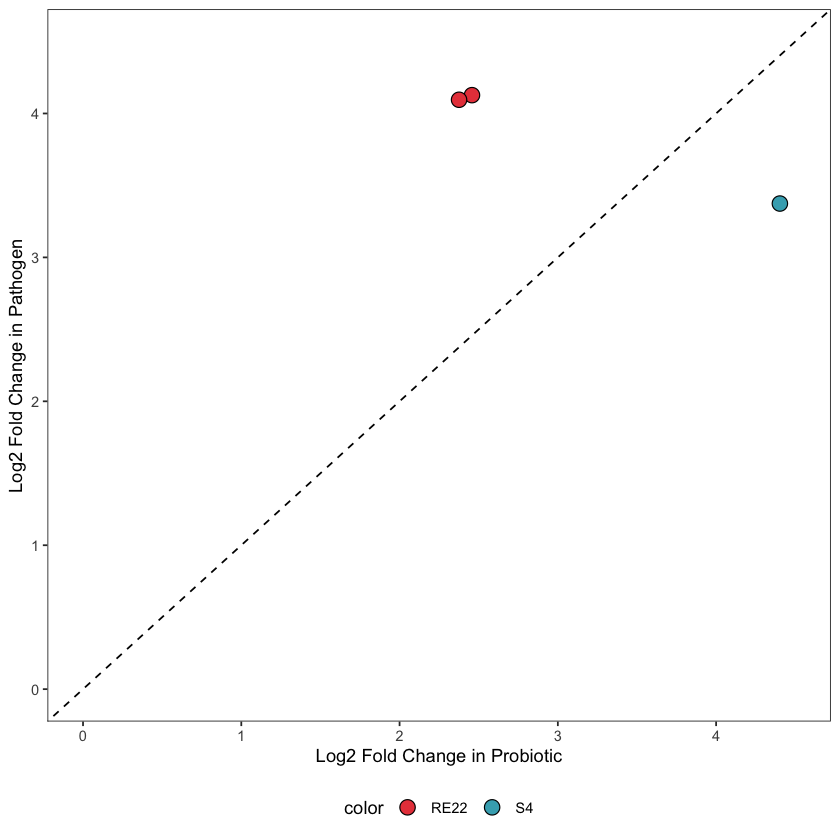

In [40]:
LFC_plot <- ggplot(LFC_data, aes(LFC_S4, LFC_RE22, fill = color)) + 
            geom_point(pch = 21, size = 4) + 
            geom_abline(slope = 1, intercept = 0, lty = 2) + 
            xlim(0,4.5) + 
            ylim(0,4.5) + 
            scale_fill_manual(values = c("#E84649","#42ACBD")) + 
            xlab("Log2 Fold Change in Probiotic") + 
            ylab("Log2 Fold Change in Pathogen") +
            theme(legend.position = "bottom")
LFC_plot

The three plots were then combined into a single plot using `ggarrange()` from the `ggpubr` package.

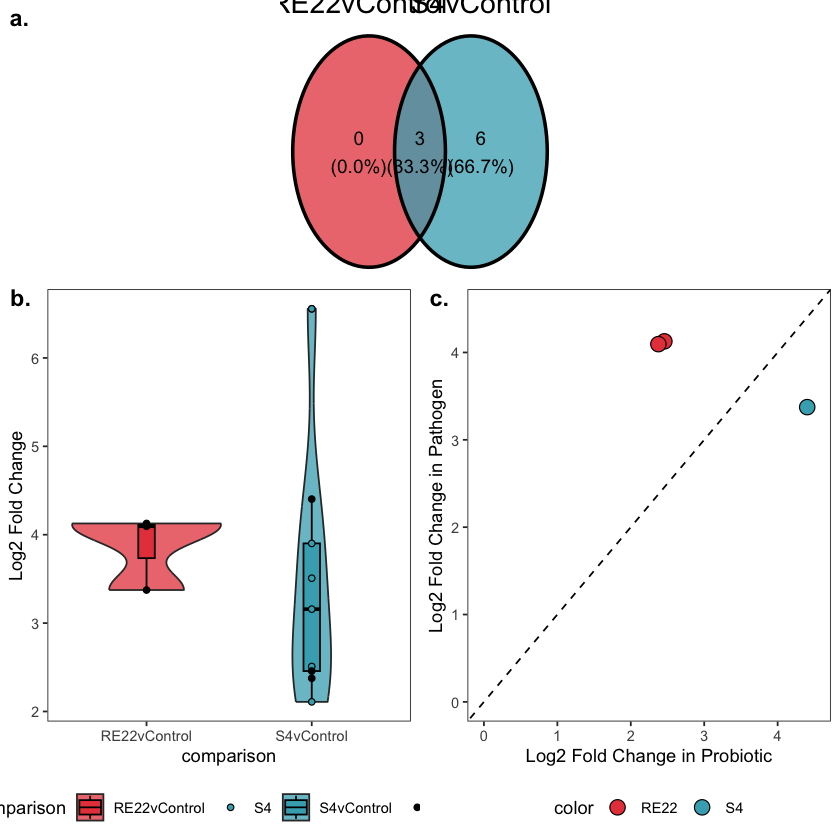

In [41]:
merged_plot <- ggarrange(venn_diagram, ggarrange(boxplot, LFC_plot, align = "hv", labels = c("b.","c.")), 
                         align = "hv", nrow = 2, ncol = 1, labels = c("a.",""), heights = c(1,2))
merged_plot

This final plot was exported as a PDF using `ggsave()` and then edited for publication in Adobe Illustrator.

In [42]:
ggsave("~/Desktop/LFC_plots.pdf", merged_plot, width = 10, height = 8)

<a id=9></a>
## Annotation plots
The last set of plots we made from the differential expression data links the transcripts with the annotations from our reference transcriptome. Again, we start by importing the differential expression results for each comparison. 

In [43]:
data_RE22 <- read.csv("DESeq_RE22vControl.csv")
data_S4 <- read.csv("DESeq_S4vControl.csv")
data_RE22S4 <- read.csv("DESeq_RE22vS4.csv")

The next two blocks of code first renames the column with transcript IDs to "transcript" and then second adds a comparison column indicating which treatments were compared for each row of stats.

In [44]:
names(data_RE22)[1] <- "transcript"
names(data_S4)[1] <- "transcript"
names(data_RE22S4)[1] <- "transcript"

In [45]:
data_RE22$comparison <- "RE22vControl"
data_S4$comparison <- "S4vControl"
data_RE22S4$comparison <- "RE22vS4"

Now we filter the data to only significant transcripts using the same parameters above (p-adjusted > 0.1 and absolute value of log2 fold change > 2).

In [46]:
data_RE22_sig <- subset(data_RE22, padj < 0.1 & abs(log2FoldChange) > 2)
data_S4_sig <- subset(data_S4, padj < 0.1 & abs(log2FoldChange) > 2)
data_RE22S4_sig <- subset(data_RE22S4, padj < 0.1 & abs(log2FoldChange) > 2)

Just as before, we merge the three dataframes into one for both the full dataset and the significant only ones. In the end you have two merged dataframes, one for the full set and one for significant transcripts only.

In [47]:
merged_data <- rbind(data_RE22, data_S4, data_RE22S4)
merged_sig_data <- rbind(data_RE22_sig, data_S4_sig, data_RE22S4_sig)

Now we use the two new dataframes to create one dataframe that includes the log fold change data for all comparisons for any transcript that was differentially expressed in at least one of the comparisons.

In [48]:
filtered_data <- subset(merged_data, transcript %in% merged_sig_data$transcript)

We added a sign column to indicate the direction of log fold change (positive/negative) and a sig column to represent significance based on p-adjusted and log fold change values. We will use these as plotting variables later.

In [49]:
filtered_data <- transform(filtered_data, sig = ifelse(padj < 0.1, ifelse(abs(log2FoldChange) > 2,"yes", "no"),"no"))
filtered_data <- transform(filtered_data, sign = ifelse(log2FoldChange < 0, "negative", "positive"))

Next, we import annotations from the reference transcriptome, merge the annotations with the differential expression data, and add a significance column for plotting.

In [50]:
annotations <- read.table("../astrangia_annos_clean.txt", sep= "\t", header = TRUE, fill = TRUE, quote = "")

In [51]:
merged_annotation <- merge(filtered_data, annotations, all.x = TRUE)
merged_annotation$GO_names[is.na(merged_annotation$GO_names)] <- "unannotated"

In [52]:
merged_annotation <- merged_annotation %>% mutate(sig = case_when(padj > 0.1 | abs(log2FoldChange) < 2 ~ "no",
                                                                  padj < 0.1 | abs(log2FoldChange) > 2 ~ "yes"))

We then constructed a plot with the transcript ID on the y axis, comparison on the x axis, and size the points by the absolute value of the log2 fold change. 

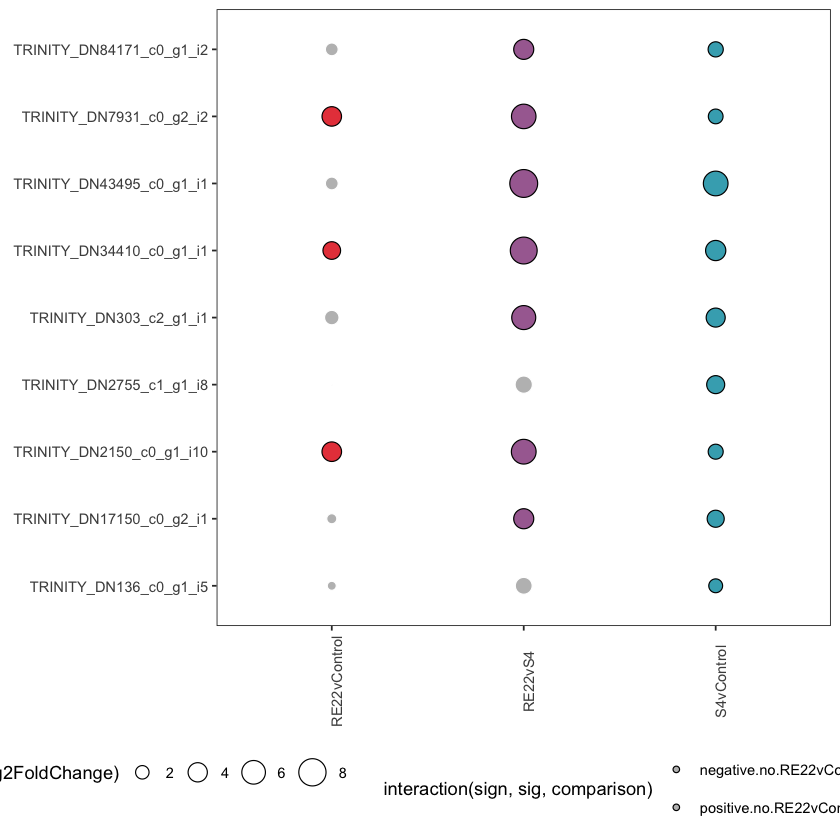

In [53]:
bubble_plot <- ggplot(merged_annotation, aes(comparison, transcript, 
                                      size = abs(log2FoldChange), 
                                      color = sig, 
                                      fill = interaction(sign, sig, comparison))) + 
        geom_point(pch = 21) + 
        theme(axis.text.x = element_text(angle = 90)) + 
        scale_size_continuous(range = c(0,7.5))  + 
        scale_color_manual(values = c('yes' = "black",
                                      'no' = "white"), 
                                       na.value = "black") +
        theme(axis.title = element_blank()) + 
        theme(legend.position = "bottom") + 
        scale_fill_manual(values = c('positive.yes.RE22vControl' = "#E84649",
                                     'positive.yes.S4vControl' = "#42ACBD",
                                     'positive.yes.RE22vS4' = "#A86DA0",
                                     'negative.yes.RE22vControl' = "#960011",
                                     'negative.yes.S4vControl' = "#006474",
                                     'negative.yes.RE22vS4' = "#6e3768",
                                     'positive.no.RE22vControl' = "grey",
                                     'positive.no.S4vControl' = "grey",
                                     'positive.no.RE22vS4' = "grey",
                                     'negative.no.RE22vControl' = "grey",
                                     'negative.no.S4vControl' = "grey",
                                     'negative.no.RE22vS4' = "grey"))
bubble_plot


Next we make a barplot showing how many differentially expressed transcripts were annotated in each comparison. We start by subsetting the `merged_annotation` dataframe to only the the significantly differentially expressed transcripts. 

In [54]:
merged_annotation_sig <- subset(merged_annotation, padj < 0.1)

All NAs and blanks in the annotation column were replaced with "unannotated".

In [55]:
merged_annotation_sig$GO_names[is.na(merged_annotation_sig$GO_names)] <- "unannotated"
merged_annotation_sig$GO_names[merged_annotation_sig$GO_names == ""] <- "unannotated"

merged_annotation_sig$geneID[merged_annotation_sig$geneID == ""] <- NA

Since each row is one transcript, we can add a column representing a count where every value is 1.

In [56]:
merged_annotation_sig$count <- 1

Now we plot the barplot.

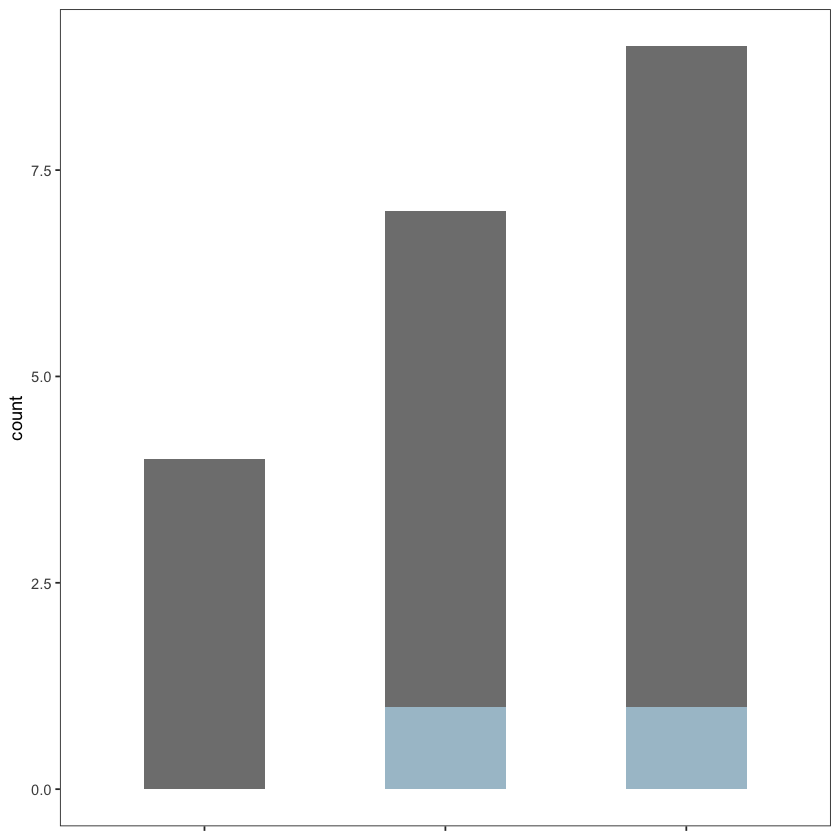

In [57]:
barplot <- ggplot(merged_annotation_sig, aes(comparison, count, fill = geneID)) + 
           geom_bar(stat = "identity", width = 0.5, position = position_stack(reverse = TRUE)) +
           theme(legend.position = "none") +
           theme(axis.title.x = element_blank(), axis.text.x = element_blank()) + 
           scale_fill_manual(values = c("#a9c2d0",
                                        "grey60")) 
barplot 

Again, we combine these two plots into a single figure using `ggarrange()` in the `ggpubr` package.

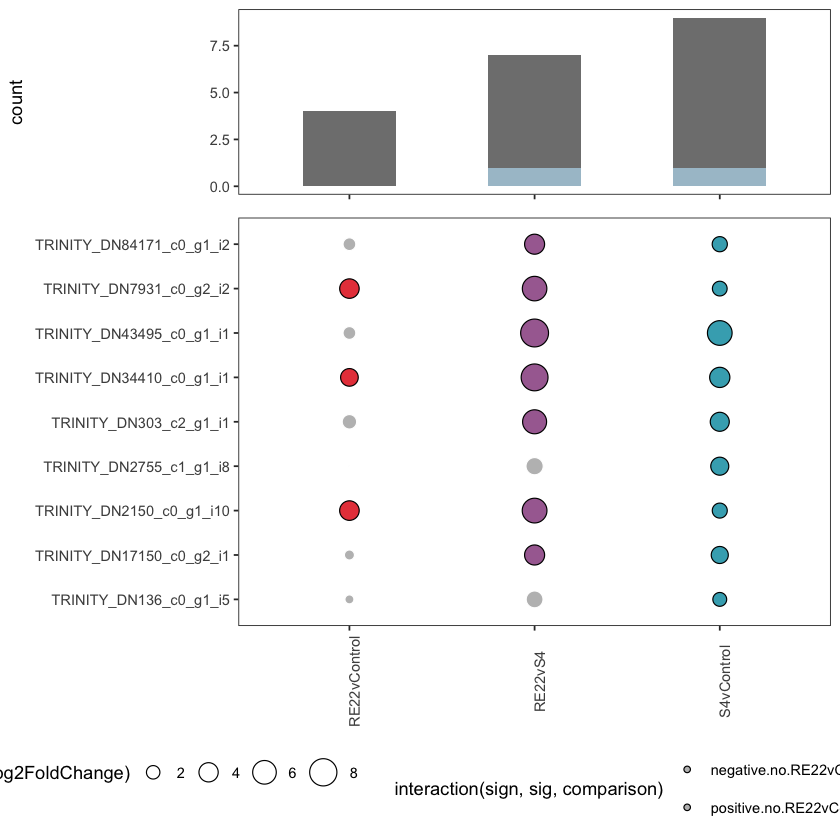

In [58]:
annotation_plot <- ggarrange(barplot, bubble_plot, nrow = 2, ncol = 1, align = "v", heights = c(0.33,1))
annotation_plot

Finally, the annotation plot was exported as a PDF using the `ggsave()` command and was edited for publication in Adobe Illustrator.

In [ ]:
ggsave("~/Desktop/annotation_plot.pdf", annotation_plot, height = 8, width = 4)